<a href="https://colab.research.google.com/github/miladlink/Beginner_Deep_Learning/blob/main/Cat%26Dog_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, shutil
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 
# 2000 train, 1000 valid, 1000, test
# 50% cat, 50% dog
 
base_dir = '/content/drive/MyDrive/cats_and_dogs_small'
os.mkdir (base_dir)

In [ ]:
train_dir = os.path.join (base_dir, 'train')
os.mkdir (train_dir)
valid_dir = os.path.join (base_dir, 'valid')
os.mkdir (valid_dir)
test_dir = os.path.join (base_dir,'test')
os.mkdir (test_dir)

In [ ]:
train_cat_dir = os.path.join (train_dir, 'cats')
os.mkdir (train_cat_dir)
train_dog_dir = os.path.join (train_dir, 'dogs')
os.mkdir (train_dog_dir)
 
valid_cat_dir = os.path.join (valid_dir, 'cats')
os.mkdir (valid_cat_dir)
valid_dog_dir = os.path.join (valid_dir, 'dogs')
os.mkdir (valid_dog_dir)
 
#test_cat_dir = os.path.join (test_dir, 'cats')
#os.mkdir (test_cat_dir)
#test_dog_dir = os.path.join (test_dir, 'dogs')
#os.mkdir (test_dog_dir)

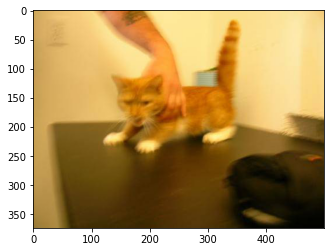

In [ ]:
from zipfile import ZipFile
 
zip_train = '/content/drive/MyDrive/CatDog/train.zip'
zip = ZipFile (zip_train, 'r')
img = zip.open ('train/cat.0.jpg')
img_r = plt.imread (img)
plt.imshow (img_r)

In [ ]:
zip.extractall()
print ('done')

done


In [ ]:
orginal_train_dir = '/content/train'
fnames = ['cat.{}.jpg'.format (i) for i in range (1000)]
for fname in fnames:
   src = os.path.join (orginal_train_dir, fname)
   dst = os.path.join (train_cat_dir, fname)
   shutil.copyfile (src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format (i) for i in range (1000)]
for fname in fnames:
   src = os.path.join (orginal_train_dir, fname)
   dst = os.path.join (train_dog_dir, fname)
   shutil.copyfile (src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format (i) for i in range (1000, 1500)]
for fname in fnames:
   src = os.path.join (orginal_train_dir, fname)
   dst = os.path.join (valid_cat_dir, fname)
   shutil.copyfile (src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format (i) for i in range (1000, 1500)]
for fname in fnames:
   src = os.path.join (orginal_train_dir, fname)
   dst = os.path.join (valid_dog_dir, fname)
   shutil.copyfile (src, dst)

In [ ]:
len (os.listdir (train_cat_dir)), len (os.listdir (train_dog_dir))

In [ ]:
len (os.listdir (valid_cat_dir)), len (os.listdir (valid_dog_dir))

In [ ]:
orginal_test_dir = '/content/drive/MyDrive/CatDog/test1.zip'
zip1 = ZipFile (orginal_test_dir, 'r')
zip1.extractall()
print ('Done!')

Done!


Data Preprocessing

In [ ]:
 
train_dir = '/content/drive/MyDrive/cats_and_dogs_small/train'
valid_dir = '/content/drive/MyDrive/cats_and_dogs_small/valid'
 
train_cat_dir = f'{train_dir}/cats'
train_dog_dir = f'{train_dir}/dogs'
train_datagen = ImageDataGenerator (rescale = 1./255)
train_generator = train_datagen.flow_from_directory (train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
 
valid_datagen = ImageDataGenerator (rescale = 1./255)
valid_generator = valid_datagen.flow_from_directory (valid_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch,labels_batch in train_generator:
   print ('data batch shape:', data_batch.shape)
   print ('labels batch shape:', labels_batch.shape)
   break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Model

In [ ]:
model = Sequential ()
model.add (Conv2D (32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add (MaxPooling2D ((2,2)))
model.add (Conv2D (64, (3,3), activation = 'relu'))
model.add (MaxPooling2D ((2,2)))
model.add (Conv2D (128, (3,3), activation = 'relu'))
model.add (MaxPooling2D ((2,2)))
model.add (Conv2D (128, (3,3), activation = 'relu'))
model.add (MaxPooling2D ((2,2)))
model.add (Flatten ())
model.add (Dense (512, activation = 'relu'))
model.add (Dense (1, activation = 'sigmoid'))
 
model.compile (loss = 'binary_crossentropy', optimizer = RMSprop (lr = 1e-4), metrics = ['acc'])

In [ ]:
history = model.fit (train_generator, steps_per_epoch = 100, epochs = 30, validation_data = valid_generator, validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 569s 6s/step - loss: 0.6879 - acc: 0.5480 - val_loss: 0.6809 - val_acc: 0.5470
Epoch 2/30
100/100 [==============================] - 12s 125ms/step - loss: 0.6600 - acc: 0.6200 - val_loss: 0.6553 - val_acc: 0.6100
Epoch 3/30
100/100 [==============================] - 13s 126ms/step - loss: 0.6193 - acc: 0.6720 - val_loss: 0.6346 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 13s 125ms/step - loss: 0.5768 - acc: 0.6950 - val_loss: 0.5934 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 13s 126ms/step - loss: 0.5367 - acc: 0.7345 - val_loss: 0.5910 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 13s 125ms/step - loss: 0.5205 - acc: 0.7365 - val_loss: 0.5689 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 12s 125ms/step - loss: 0.4855 - acc: 0.7735 - val_loss: 0.5587 - val_acc: 0.7140
Epoch 8/30
100/100 [==============================] - 13s

In [ ]:
model.save ('cats_and_dogs_small_1.h5')

In [ ]:
acc = history.history ['acc']
val_acc = history.history ['val_acc']
 
loss = history.history ['loss']
val_loss = history.history ['val_loss']
 
epochs = range (1, len (acc) + 1)

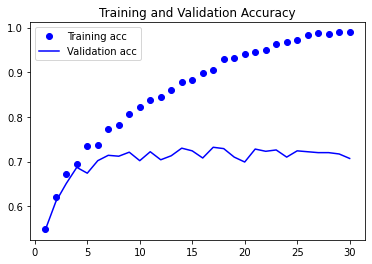

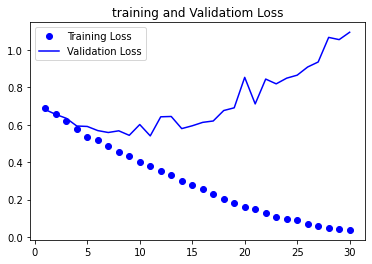

In [ ]:
plt.plot (epochs, acc, 'bo', label = 'Training acc')
plt.plot (epochs, val_acc, 'b', label = 'Validation acc')
plt.title ('Training and Validation Accuracy')
plt.legend ()
plt.figure ()
plt.plot (epochs, loss, 'bo', label = 'Training Loss')
plt.plot (epochs, val_loss, 'b', label = 'Validation Loss')
plt.title ('training and Validatiom Loss')
plt.legend ()
plt.show ()

Data Augmentation

In [ ]:
datagen = ImageDataGenerator (rescale = 1./ 255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

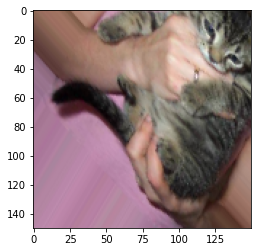

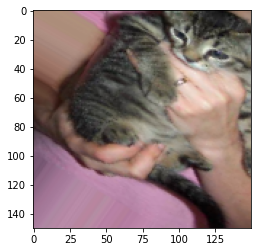

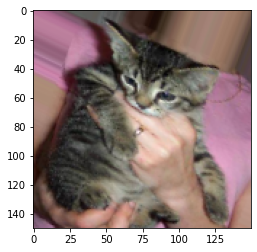

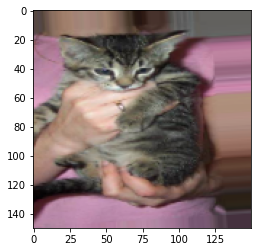

In [ ]:
from keras.preprocessing import image
fnames = [os.path.join (train_cat_dir, fname) for fname in os.listdir (train_cat_dir)]
img_path = fnames [3]
img = image.load_img (img_path, target_size = (150,150))
x = image.img_to_array (img)
x = x.reshape ((1,) + x.shape)
i = 0
for batch in datagen.flow (x, batch_size = 1):
   plt.figure (i)
   imgplot = plt.imshow (image.array_to_img (batch[0]))
   i += 1
   if i % 4 ==0:
      break
plt.show ()

In [ ]:
test_datagen = ImageDataGenerator (rescale = 1./ 255)
train_gen = datagen.flow_from_directory (train_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary')
valid_gen = test_datagen.flow_from_directory (valid_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit (train_gen, steps_per_epoch = 20, epochs = 100, validation_data = valid_gen, validation_steps = 10)

Epoch 1/100
20/20 [==============================] - 7s 333ms/step - loss: 0.6800 - acc: 0.5547 - val_loss: 0.6663 - val_acc: 0.6344
Epoch 2/100
20/20 [==============================] - 6s 327ms/step - loss: 0.6715 - acc: 0.5938 - val_loss: 0.6720 - val_acc: 0.5813
Epoch 3/100
20/20 [==============================] - 7s 328ms/step - loss: 0.6746 - acc: 0.5844 - val_loss: 0.6784 - val_acc: 0.5312
Epoch 4/100
20/20 [==============================] - 6s 320ms/step - loss: 0.6762 - acc: 0.5753 - val_loss: 0.6598 - val_acc: 0.5906
Epoch 5/100
20/20 [==============================] - 6s 324ms/step - loss: 0.6589 - acc: 0.6138 - val_loss: 0.6581 - val_acc: 0.6375
Epoch 6/100
20/20 [==============================] - 6s 328ms/step - loss: 0.6650 - acc: 0.6031 - val_loss: 0.6503 - val_acc: 0.6156
Epoch 7/100
20/20 [==============================] - 7s 332ms/step - loss: 0.6755 - acc: 0.6078 - val_loss: 0.6646 - val_acc: 0.5844
Epoch 8/100
20/20 [==============================] - 6s 322ms/step - 

In [ ]:
model.save ('cats_and_dogs_small_2.h5')

In [ ]:
 acc = history.history ['acc']
val_acc = history.history ['val_acc']
 
loss = history.history ['loss']
val_loss = history.history ['val_loss']
 
epochs = range (1, len (acc) + 1)

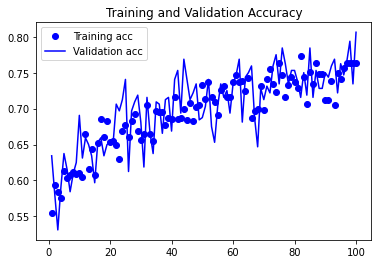

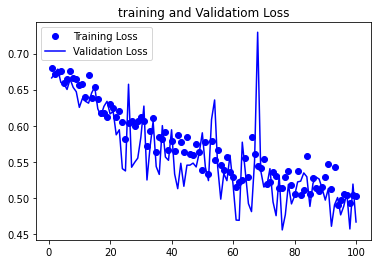

In [ ]:
 plt.plot (epochs, acc, 'bo', label = 'Training acc')
plt.plot (epochs, val_acc, 'b', label = 'Validation acc')
plt.title ('Training and Validation Accuracy')
plt.legend ()
plt.figure ()
plt.plot (epochs, loss, 'bo', label = 'Training Loss')
plt.plot (epochs, val_loss, 'b', label = 'Validation Loss')
plt.title ('training and Validatiom Loss')
plt.legend ()
plt.show ()